## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
df = pd.read_csv('./data/final/02_class_dedornot_ra.csv')

In [4]:
df.head()

,Index,Patient=1,Actinobacteria,Bacilli,Betaproteobacteria,Gammaproteobacteria,Clostridia,Alphaproteobacteria,Bacteroidia,Chloroplast,...,Chloroflexia,Lentisphaeria,Nitrospira,Chlamydiae,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.172532,0.095528,0.043398,0.029704,0.198002,0.112001,0.059010,0.03493,...,0.0,0.0,0.0,0.0,1,65,0,0,NaN,NaN
1,P2,1,0.705676,0.202435,0.005359,0.032681,0.023419,0.017399,0.008071,0.00000,...,0.0,0.0,0.0,0.0,1,67,0,0,31.25,17.0
2,P3,1,0.121972,0.342753,0.032760,0.077895,0.239179,0.068630,0.038319,0.00000,...,0.0,0.0,0.0,0.0,1,33,0,0,33.30,16.0
3,P4,1,0.142101,0.235578,0.159632,0.037708,0.191585,0.190064,0.000000,0.00000,...,0.0,0.0,0.0,0.0,1,66,0,0,93.75,21.0
4,P5,1,0.358740,0.283313,0.052071,0.067156,0.018195,0.055842,0.041749,0.00000,...,0.0,0.0,0.0,0.0,0,69,0,0,6.25,7.0


In [5]:
df.iloc[:,2:]

,Actinobacteria,Bacilli,Betaproteobacteria,Gammaproteobacteria,Clostridia,Alphaproteobacteria,Bacteroidia,Chloroplast,Cyanobacteria,Coriobacteriia,...,Chloroflexia,Lentisphaeria,Nitrospira,Chlamydiae,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,0.172532,0.095528,0.043398,0.029704,0.198002,0.112001,0.059010,0.034930,0.0,0.000000,...,0.0,0.0,0.0,0.0,1,65,0,0,NaN,NaN
1,0.705676,0.202435,0.005359,0.032681,0.023419,0.017399,0.008071,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1,67,0,0,31.25,17.0
2,0.121972,0.342753,0.032760,0.077895,0.239179,0.068630,0.038319,0.000000,0.0,0.024619,...,0.0,0.0,0.0,0.0,1,33,0,0,33.30,16.0
3,0.142101,0.235578,0.159632,0.037708,0.191585,0.190064,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1,66,0,0,93.75,21.0
4,0.358740,0.283313,0.052071,0.067156,0.018195,0.055842,0.041749,0.000000,0.0,0.077015,...,0.0,0.0,0.0,0.0,0,69,0,0,6.25,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.642054,0.165476,0.007940,0.099378,0.013299,0.025473,0.000000,0.010520,0.0,0.000000,...,0.0,0.0,0.0,0.0,1,50,1,0,14.50,9.0
87,0.487164,0.450112,0.004036,0.012108,0.034273,0.007940,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1,60,0,0,0.00,2.0
88,0.282576,0.050758,0.633181,0.005029,0.002581,0.017471,0.000993,0.000662,0.0,0.000000,...,0.0,0.0,0.0,0.0,1,51,1,1,14.50,3.0
89,0.623379,0.361405,0.002646,0.004631,0.001985,0.001654,0.000000,0.000066,0.0,0.000000,...,0.0,0.0,0.0,0.0,1,48,0,0,0.00,0.0


In [6]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [7]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 48)
(19, 48)
(72,)
(19,)


## Train, predict and explain

### XGBoost

In [10]:
clfxgb = XGBClassifier(random_state=42)
clfxgb.fit(X, y)
y_predxgb = clfxgb.predict(X)

In [11]:
print('Accuracy:',accuracy_score(y, y_predxgb))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predxgb))
print('F1 score:',f1_score(y, y_predxgb,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predxgb))
print(confusion_matrix(y, y_predxgb))

Accuracy: 1.0
Balanced accuracy:  1.0
F1 score: 1.0
MCC: 1.0
[[30  0]
 [ 0 61]]


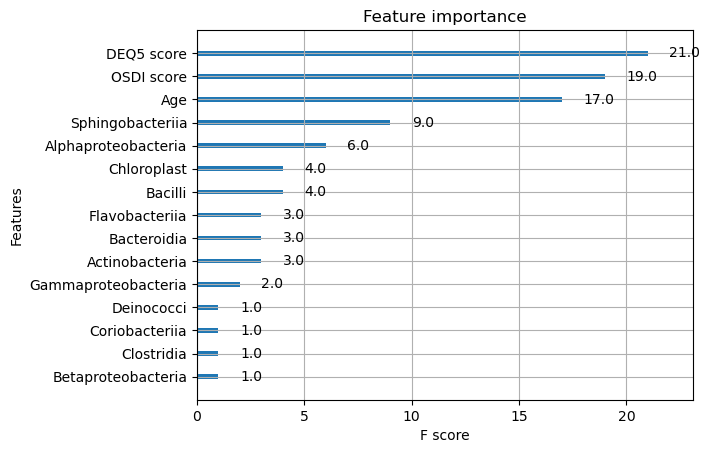

In [12]:
fig, ax = plt.subplots()
plot_importance(clfxgb, max_num_features = 20, ax=ax)
plt.title('Feature importance')

plt.show()

In [13]:
# Create a SHAP explainer for the XGBoost model
explainerxgb = shap.Explainer(clfxgb, X_test)

# Compute SHAP values for the dataset
shap_valuesxgb = explainerxgb(X_test)

[13:23:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


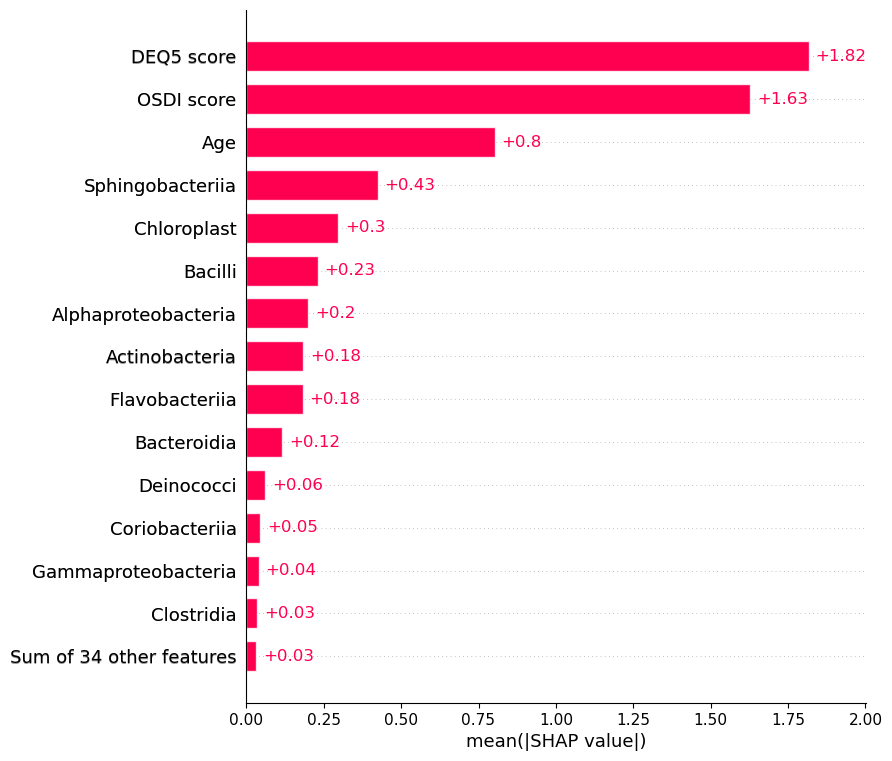

In [14]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valuesxgb, max_display=15)

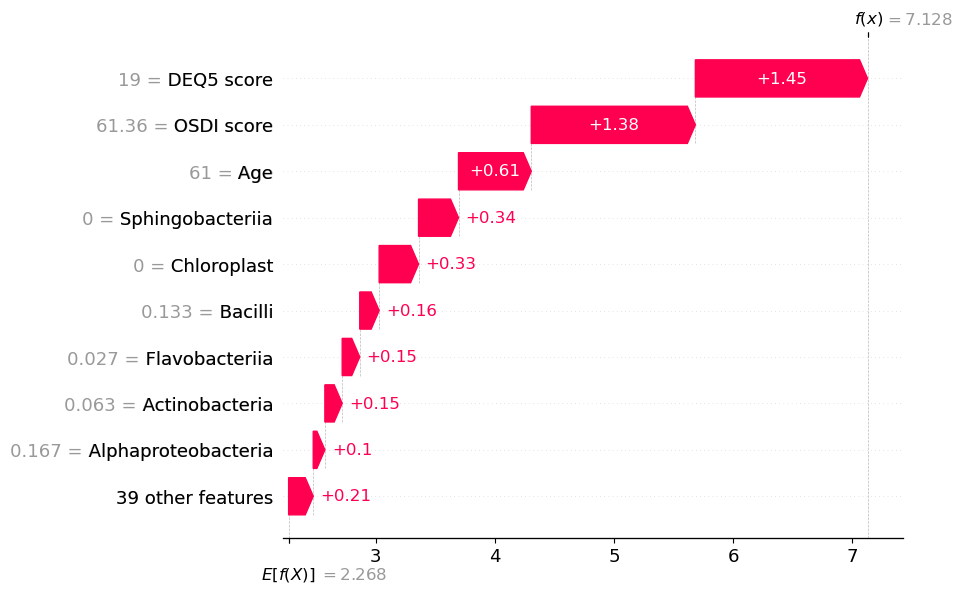

In [15]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valuesxgb[instance_index])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


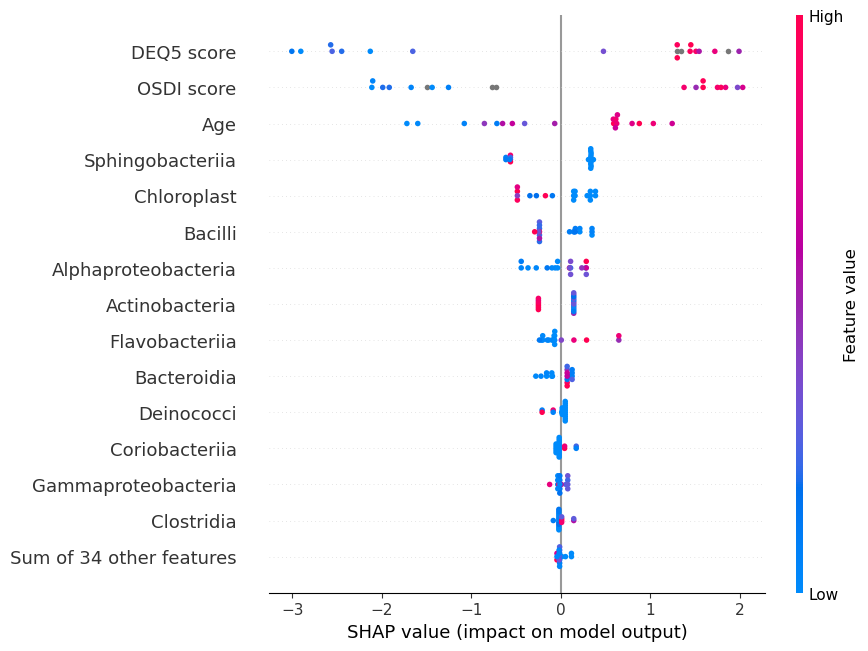

In [16]:
shap.plots.beeswarm(shap_valuesxgb, max_display=15)

### LightGBM

In [ ]:
clflgbm = LGBMClassifier(random_state=42)
clflgbm.fit(X, y)
y_predlgbm = clflgbm.predict(X)

In [18]:
print('Accuracy:',accuracy_score(y, y_predlgbm))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predlgbm))
print('F1 score:',f1_score(y, y_predlgbm,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predlgbm))
print(confusion_matrix(y, y_predlgbm))

Accuracy: 1.0
Balanced accuracy:  1.0
F1 score: 1.0
MCC: 1.0
[[30  0]
 [ 0 61]]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

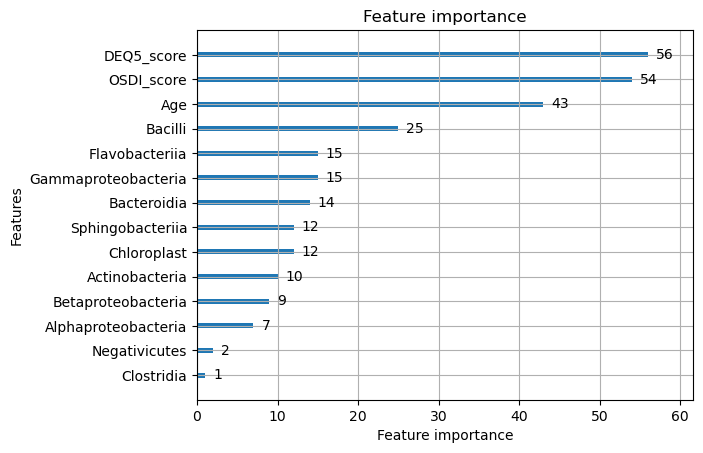

In [19]:
lgb.plot_importance(clflgbm)

In [20]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X_test)

In [21]:
# Compute SHAP values for the dataset

shap_valueslgbm = explainerlgbm(X_test)

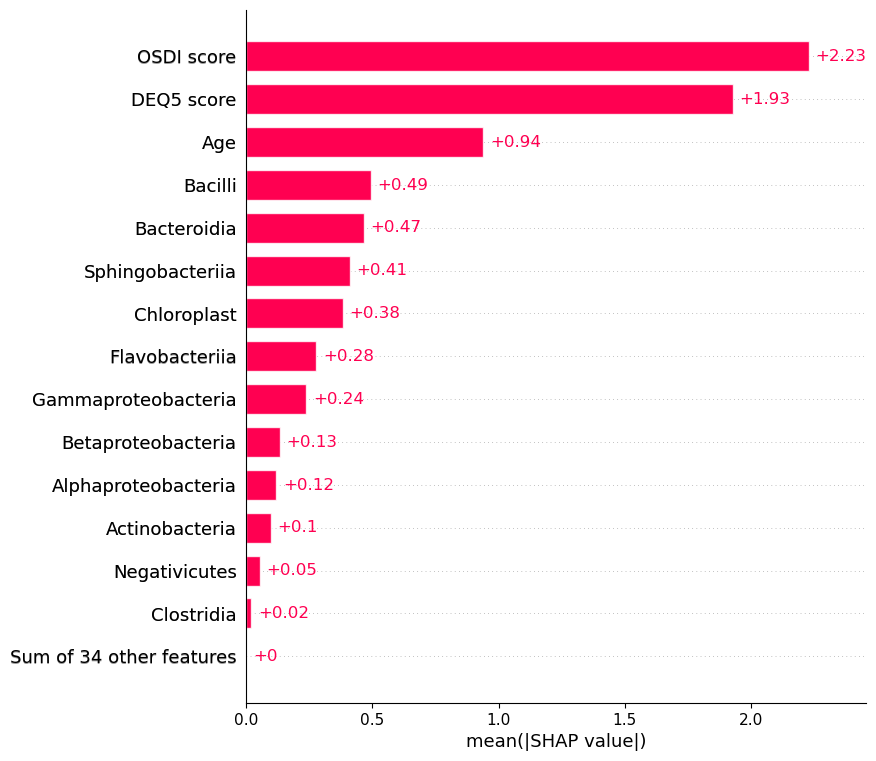

In [22]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valueslgbm, max_display=15)

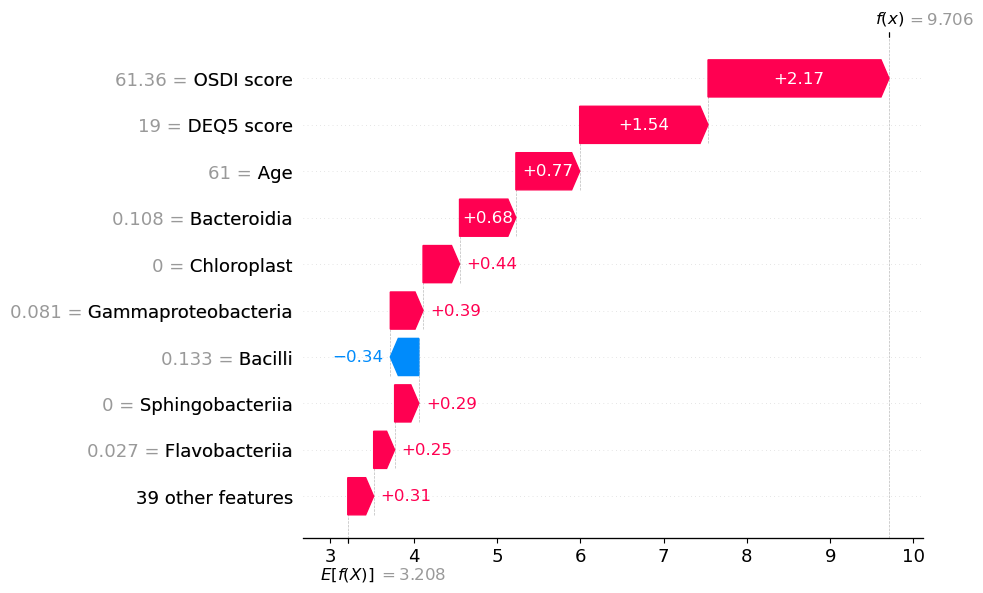

In [23]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valueslgbm[instance_index])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


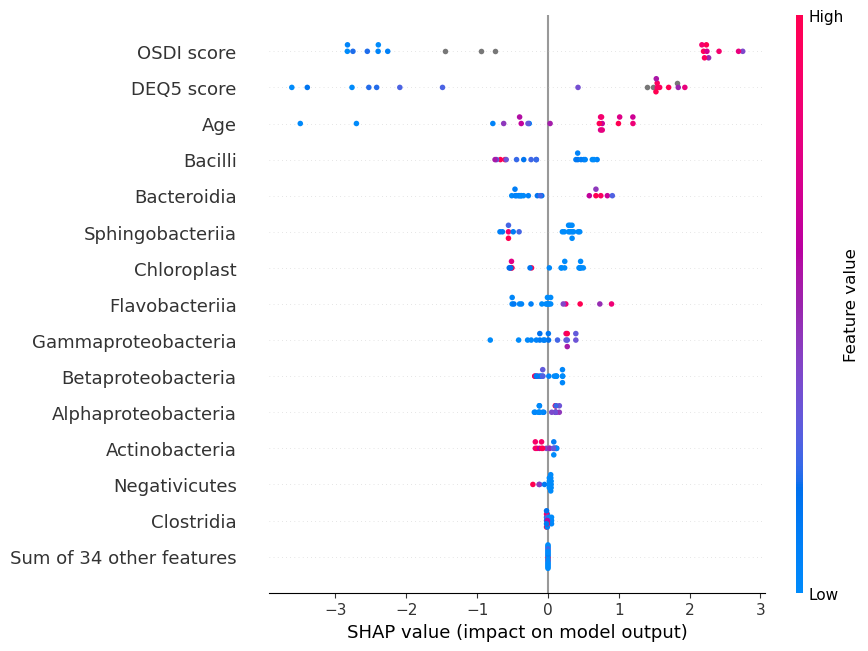

In [24]:
shap.plots.beeswarm(shap_valueslgbm, max_display=15)